# Библиотеки Python для DS (семинары)

Урок 4. Практическая работа. Построение модели бинарной классификации

Используя diabetes-dataset, выполните следующие шаги:

1. Предварительная обработка данных:
— Очистите данные от пропусков (если они есть), обработайте аномалии и нормализуйте данные, если это необходимо.
— Разделите датасет на обучающую и тестовую выборки.

2. Построение модели:
— Используя алгоритм логистической регрессии, постройте модель бинарной классификации для предсказания наличия диабета у пациентов.
— Обучите модель на обучающем наборе данных.

3. Оценка модели:
— Вычислите и проанализируйте метрики точности (accuracy), точности (precision), полноты (recall) и F1-меру для обученной модели на тестовых данных.

## Выполнение домашней работы

##### Используя diabetes-dataset

In [7]:
# Библиотеки для скачивания датасета
from pathlib import Path
import opendatasets as od

In [8]:
# Скачиваем датасет
dataset_path = Path('mathchi/diabetes-data-set')
# Проверяем существование директории с датасетом
if not dataset_path.is_file():
    od.download('https://www.kaggle.com/datasets/mathchi/diabetes-data-set')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:Your Kaggle Key:Dataset URL: https://www.kaggle.com/datasets/mathchi/diabetes-data-set


100%|██████████| 8.91k/8.91k [00:00<00:00, 3.04MB/s]

In [2]:
# Библиотеки для работы с датасетом и графиками
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [3]:
# Загружаем датасет
df_diaD = pd.read_csv('diabetes-data-set/diabetes.csv')

##### 1. Предварительная обработка данных:
— Очистите данные от пропусков (если они есть), обработайте аномалии и нормализуйте данные, если это необходимо.

— Разделите датасет на обучающую и тестовую выборки.

In [11]:
# Выводим дата фрейм
df_diaD.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Этот фрейм данных содержит следующие столбцы:

1. Pregnancies: Number of times pregnant (Количество беременостей у одной женщины)
2. Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test (Концентрация глюкозы в плазме крови через 2 часа при пероральном тесте на толерантность к глюкозе)
3. BloodPressure: Diastolic blood pressure (Диастолическое кровяное давление) (mm Hg) 
4. SkinThickness: Triceps skin fold thickness (Толщина кожной складки трицепса) (mm)
5. Insulin: 2-Hour serum insulin (2-часовой прием сывороточного инсулина) (mu U/ml)
6. BMI: Body mass index (Индекс массы тела) (weight in kg/(height in m)^2)
7. DiabetesPedigreeFunction: Diabetes pedigree function (Наследственная функция диабета)
8. Age: Age (Возвраст) (years)
9. Outcome: Class variable (Class variable) (0 or 1)

In [12]:
# Выводим общую информацию
df_diaD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [13]:
# Смотрим тип данных
df_diaD.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

Из общей информации следует:
1. DataFrame содержит 1429 записей (от индекса 0 до 1428).
2. Всего 9 колонок
3. Нулевые значения отсуствуют
4. Нет пропущеных записей в колонках
5. Две колонки BMI и DiabetesPedigreeFunction в float64 значениях остальные в int64

<Axes: ylabel='Outcome'>

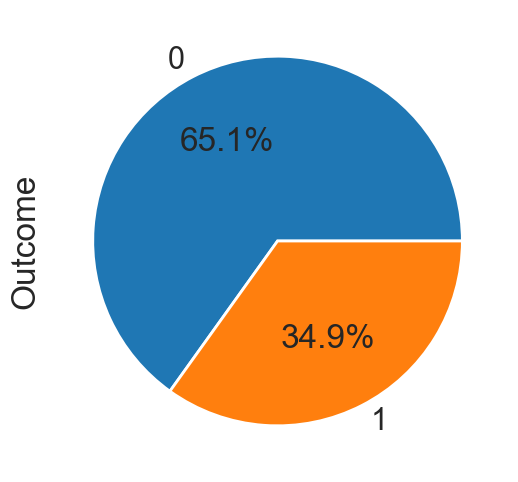

In [18]:
sns.set_style('darkgrid')
sns.set_context('poster')
plt.rcParams['figure.figsize'] = [8,6]
df_diaD.groupby('Outcome').size().plot(kind='pie',
    y = "Outcome",
    label = "Outcome",
    autopct='%1.1f%%')

Наблюдаем ситуацию небольшого дисбаланса классов, с долей 65.1% участников не больных диабетом и 34.9% с диабетом без указания типа. Данный набор имеет немного меньше представительсво одного класса по сравнению с другим.

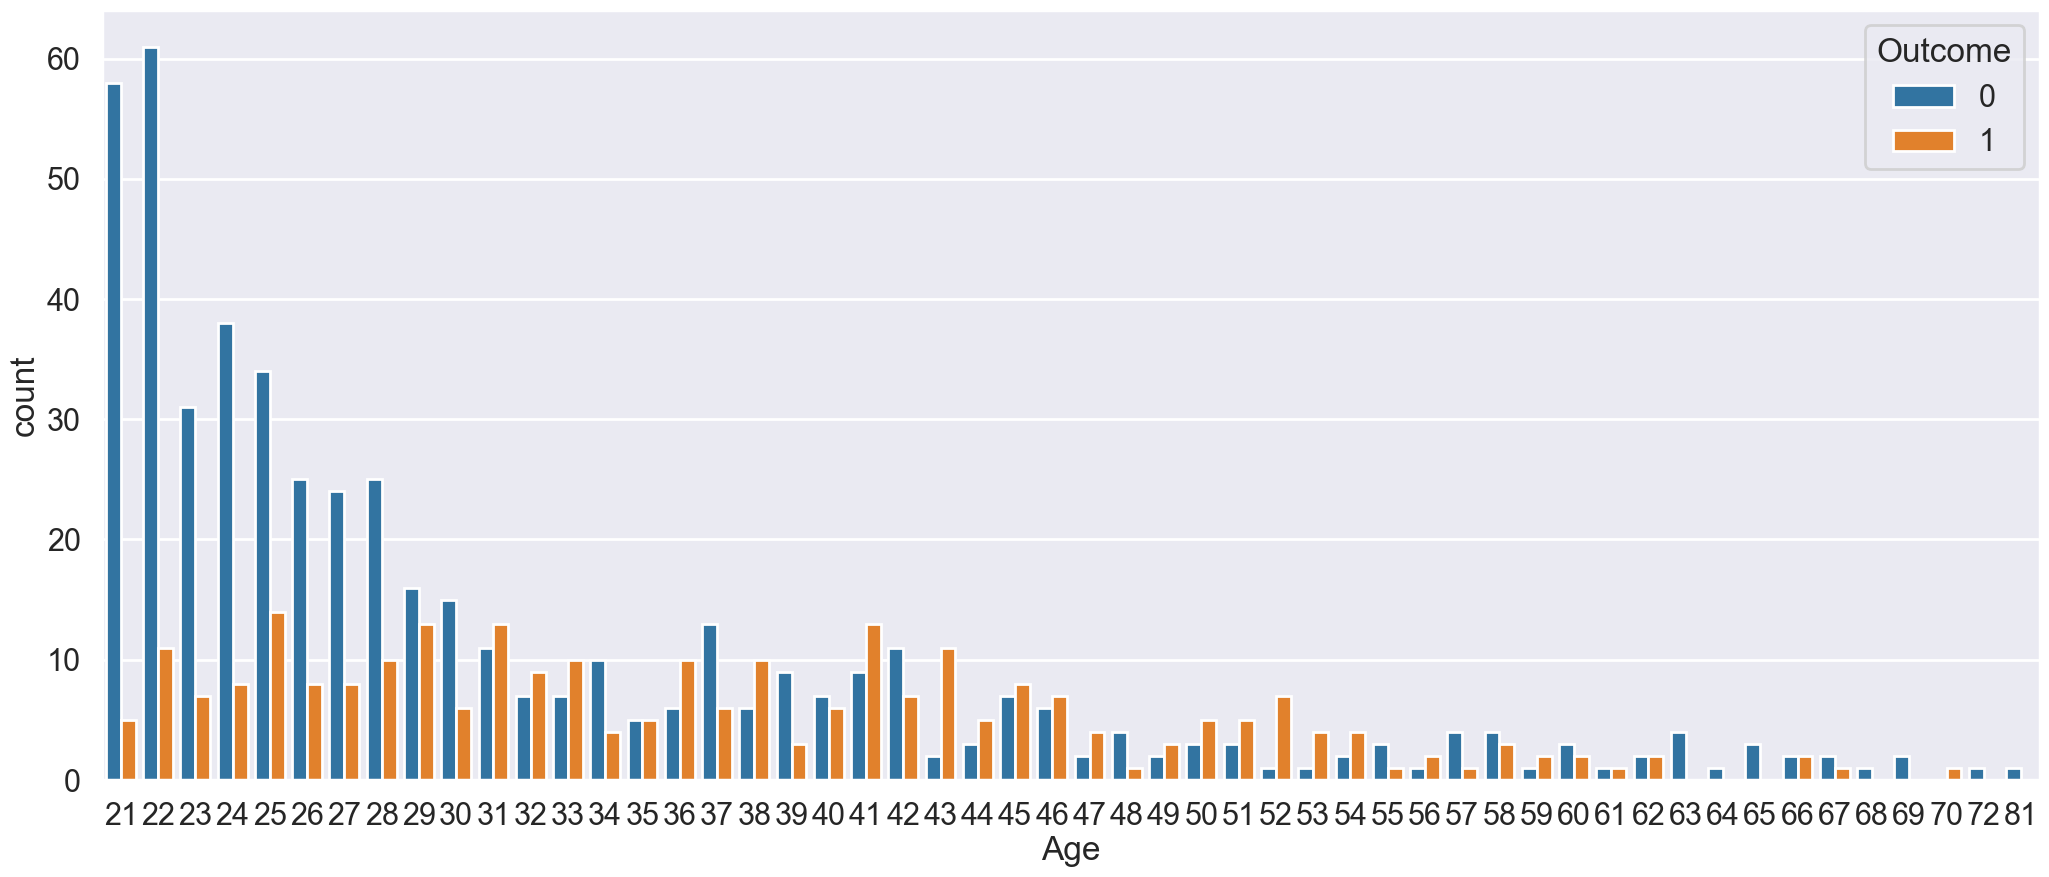

In [24]:
plt.figure(figsize=(25,10))
sns.countplot(x='Age',hue='Outcome',data=df_diaD)
plt.show()

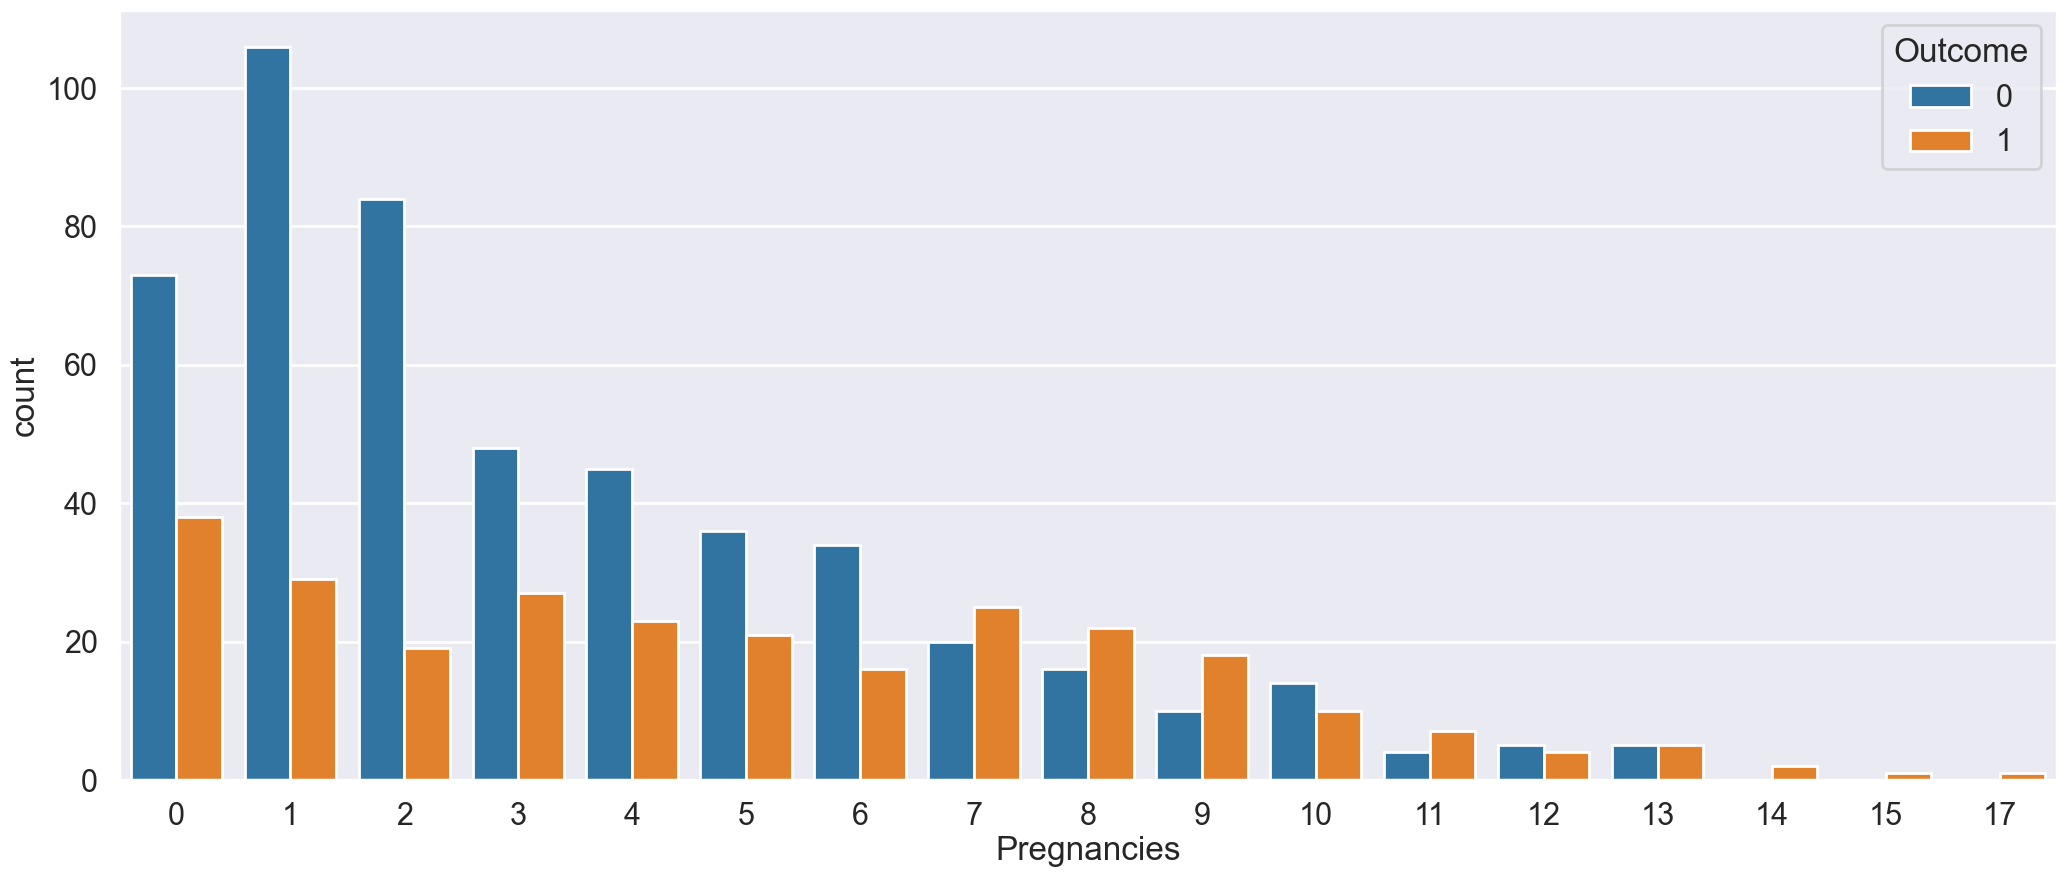

In [28]:
plt.figure(figsize=(25,10))
sns.countplot(x='Pregnancies',hue='Outcome',data=df_diaD)
plt.show()

In [7]:
import altair as alt
sel = alt.selection_single(fields=["Outcome"])

c1= alt.Chart(df_diaD).mark_circle().encode(
    x="DiabetesPedigreeFunction",
    y="BMI",
    color=alt.Color('Outcome')
)
c1

C:\Users\Esdesu\AppData\Local\Temp\ipykernel_4032\3916412953.py:2: AltairDeprecationWarning: Deprecated in `altair=5.0.0`. Use selection_point instead.
  sel = alt.selection_single(fields=["Outcome"])


alt.Chart(...)

In [15]:
# Статистический анализ числовых переменных
df_diaD.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


На основе представленных статистических данных неприрывных признаков можно сделать следующие выводы:

1. Pregnancies: Number of times pregnant (Количество беременостей у одной женщины): 
- Средний общий рейтинг на уровне 3.00
- Миниманая 0.00
- Максимальная 17.00
- Медиана равна 3.84
- Отклонение состовляет 3.36
2. Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test (Концентрация глюкозы в плазме крови через 2 часа при пероральном тесте на толерантность к глюкозе):
- Средние Счёт/Оценка, счастья на уровне 117.00
- Миниманая 0.00
- Максимальная 199.00
- Медиана равна 120.89
- Отклонение состовляет 31.97
3. BloodPressure: Diastolic blood pressure (Диастолическое кровяное давление) (mm Hg):
- Средние значение ВВП на душу населения на уровне 72.00
- Миниманая 0.00
- Максимальная 122.00
- Медиана равна 69.10
- Отклонение состовляет 19.35
4. SkinThickness: Triceps skin fold thickness (Толщина кожной складки трицепса) (mm):
- Средние социальной поддержки на уровне 23.00
- Миниманая 0.00
- Максимальная 99.00
- Медиана равна 20.53
- Отклонение состовляет 15.95
5. Insulin: 2-Hour serum insulin (2-часовой прием сывороточного инсулина) (mu U/ml):
- Средние значение продолжительность здоровой жизни на уровне 30.50
- Миниманая 0.00
- Максимальная 846.00
- Медиана равна 79.79
- Отклонение состовляет 115.24
6. BMI: Body mass index (Индекс массы тела) (weight in kg/(height in m)^2):
- Средние значение Свободы выбора в жизни на уровне 32.00
- Миниманая 0.00
- Максимальная 67.10
- Медиана равна 31.99
- Отклонение состовляет 7.88
7. DiabetesPedigreeFunction: Diabetes pedigree function (Наследственная функция диабета):
- Средние значение щедрости на уровне 0.37
- Миниманая 0.07
- Максимальная 2.42
- Медиана равна 0.47
- Отклонение состовляет 0.33
8. Age: Age (Возвраст) (years):
- Средние значение щедрости на уровне 29.00
- Миниманая 21.00
- Максимальная 81.00
- Медиана равна 33.24
- Отклонение состовляет 11.76

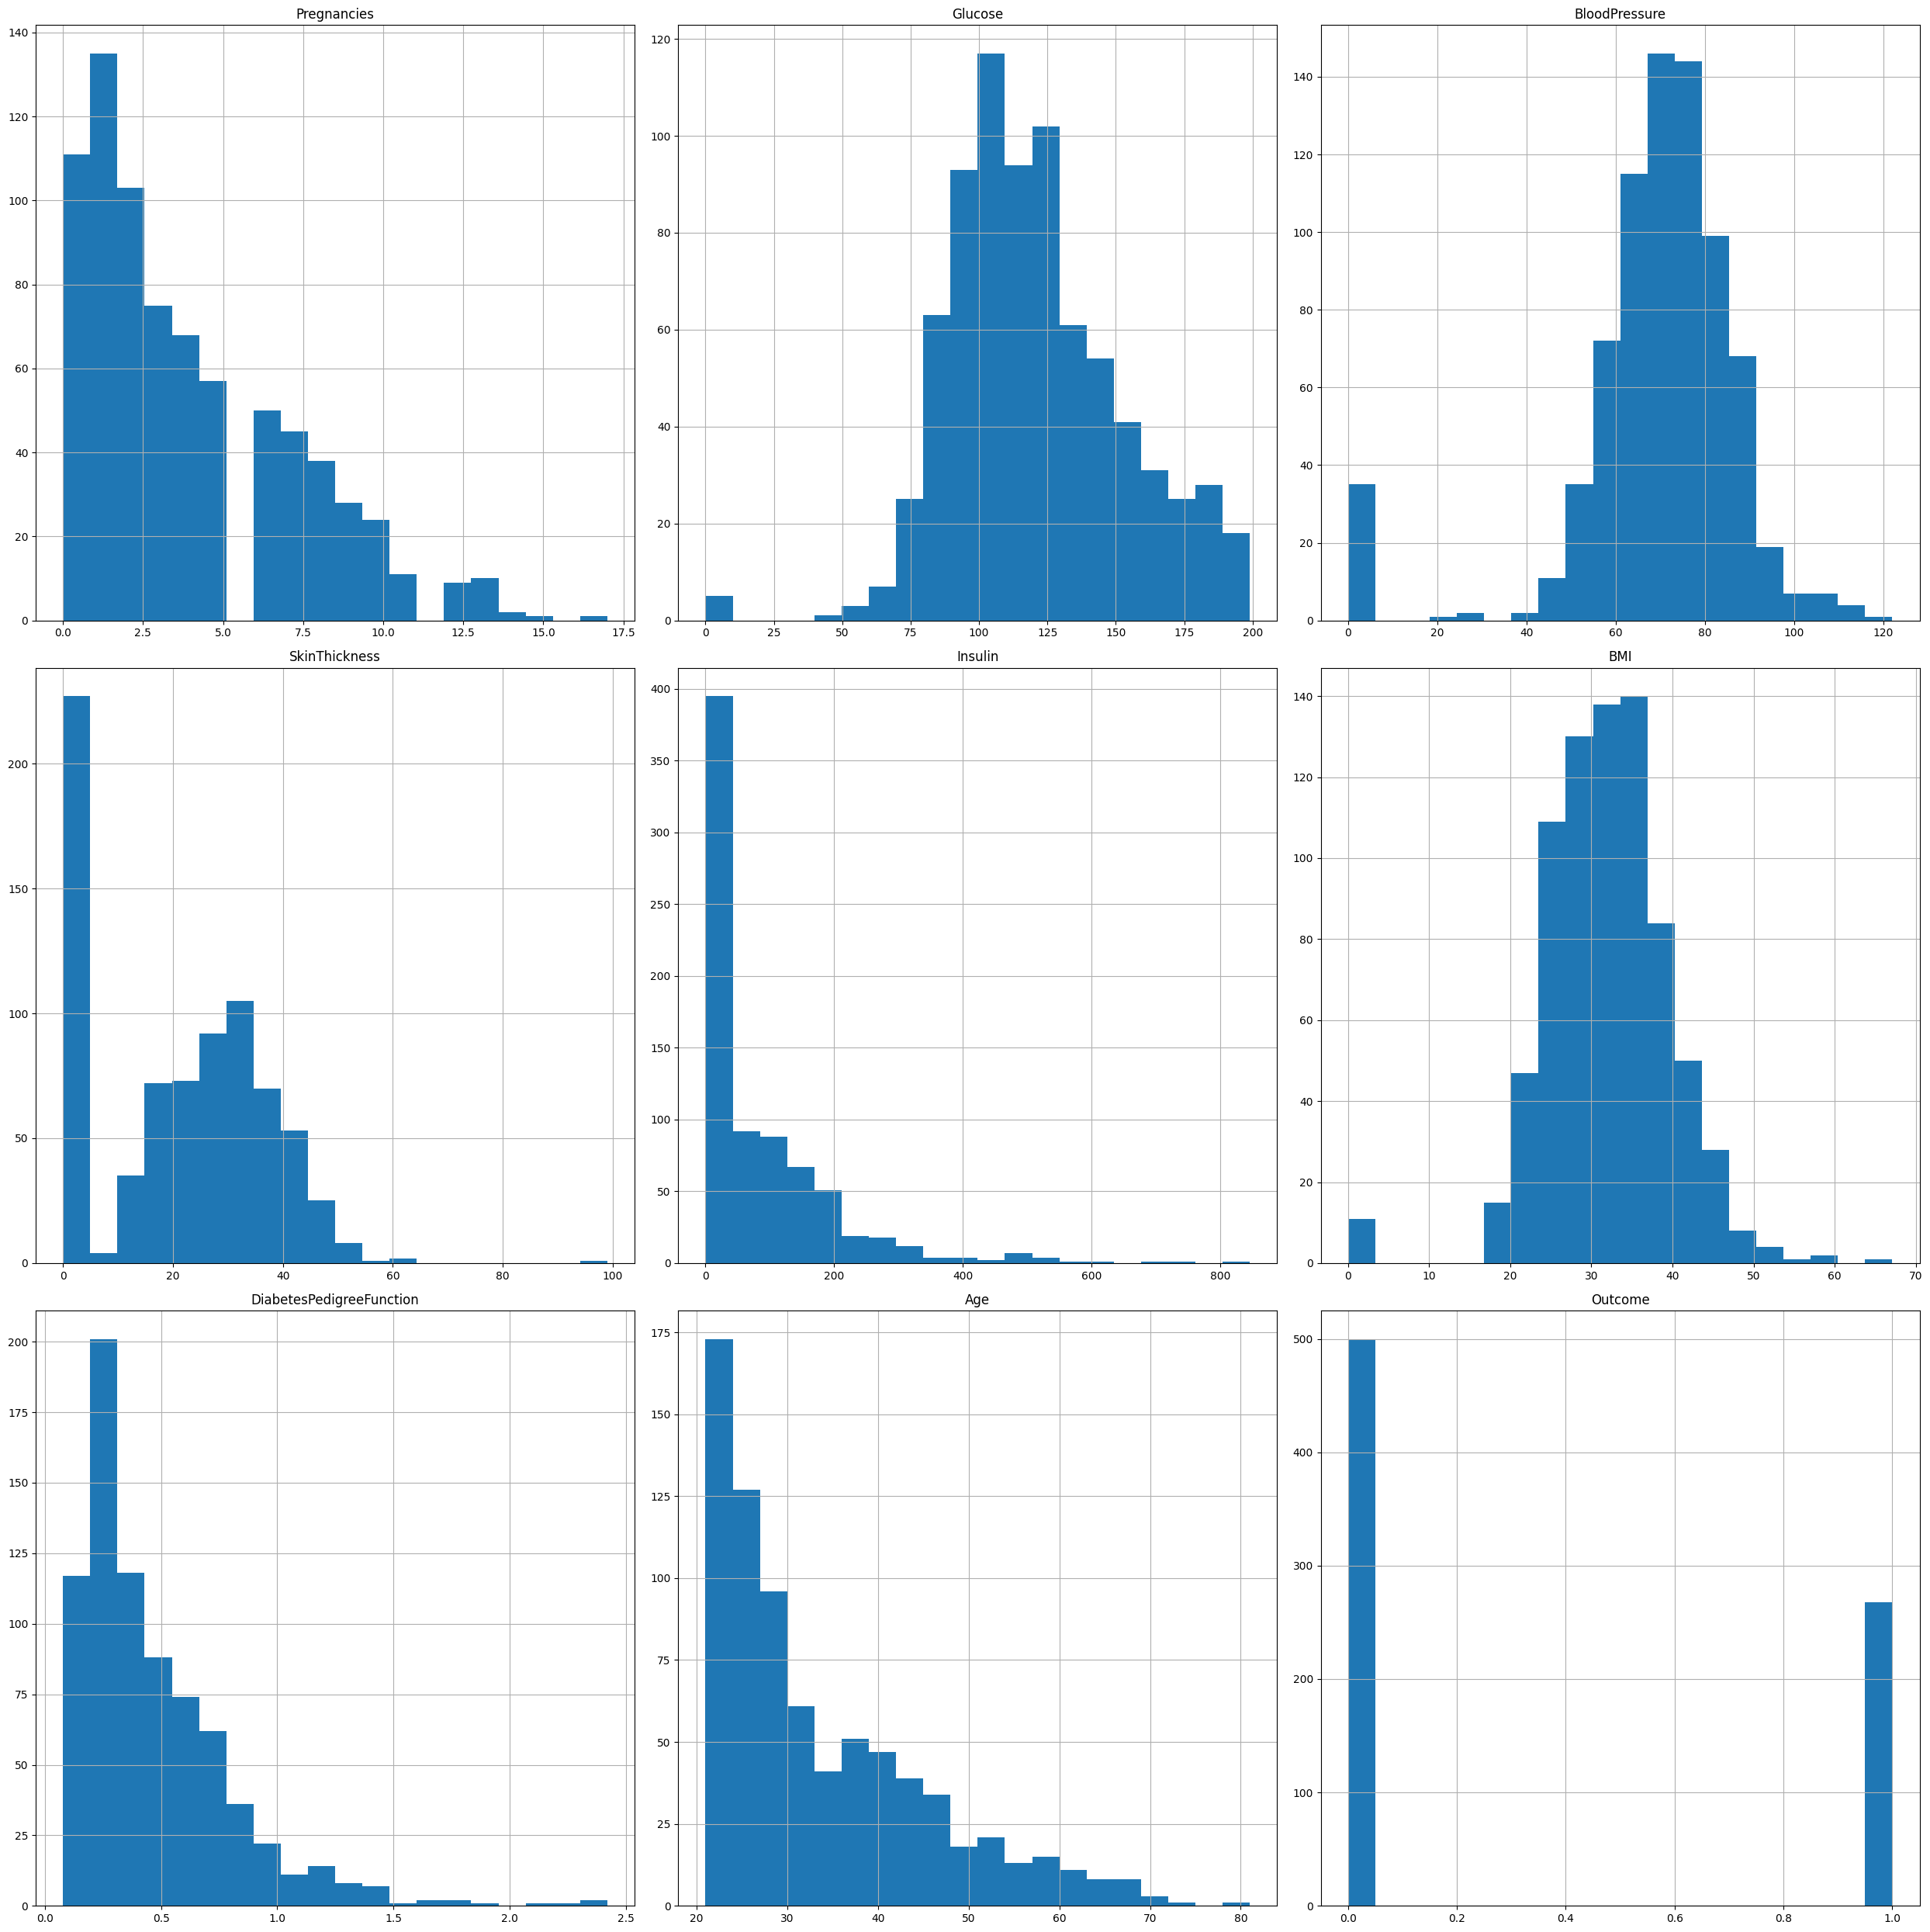

In [8]:
# Генерирует гистограммы для всех числовых столбцов в DataFrame
df_diaD.hist(figsize=(25, 25), bins=20)
plt.tight_layout() # Улучшает размещение подграфиков чтобы они не пересекались
plt.show()

##### 2. Построение модели:

— Используя алгоритм логистической регрессии, постройте модель бинарной классификации для предсказания наличия диабета у пациентов.

— Обучите модель на обучающем наборе данных.

##### 3. Оценка модели:

— Вычислите и проанализируйте метрики точности (accuracy), точности (precision), полноты (recall) и F1-меру для обученной модели на тестовых данных.

In [19]:
# Оценка качества модели
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse},\
      \n MAE: {mae},\
      \n R2: {r2}')

MSE: 0.6629874283048177,      
 MAE: 0.6059780051879192,      
 R2: 0.4940606792889837
